In [3]:
import numpy as np
import sklearn as sk
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
import transforming_data
import xgboost as xgb
from sklearn.metrics import classification_report

In [4]:
data = transforming_data.get_transformed_data()

In [5]:
data.head()

,Age,Gender,Income,Education_Level,Travel_Frequency,Preferred_Activities,Vacation_Budget,Location,Proximity_to_Mountains,Proximity_to_Beaches,Pets,Environmental_Concerns,Output,fall,spring,summer,winter
0,0.745098,1,0.514813,1.0,1.561130,1,0.439529,2,0.273154,1.352070,0,1,1,0.0,0.0,1.0,0.0
1,1.000000,1,0.687591,2.0,-1.226478,3,0.950867,1,0.884340,0.458057,0,1,0,1.0,0.0,0.0,0.0
2,0.549020,0,0.265448,2.0,-1.574928,1,0.215429,2,-0.926154,1.503008,0,0,1,0.0,0.0,0.0,1.0
3,0.274510,2,0.790720,0.0,0.515777,0,0.218319,0,-1.387426,1.212744,1,0,1,0.0,0.0,1.0,0.0
4,0.823529,0,0.866175,0.0,0.167326,2,0.003557,1,-1.479681,0.005246,1,1,0,0.0,0.0,0.0,1.0


In [6]:
print("Number of features : " , data.shape[1])
print("Number of examples : " , data.shape[0])
print(data.shape)

Number of features :  17
Number of examples :  5000
(5000, 17)


In [7]:
X = data.drop(columns='Output')  
y = data['Output'].values.reshape(-1, 1)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)
y_train.reshape(1 , -1)
y_test.reshape(1 , -1)
print("done")

done


# SVM

In [9]:
def create_svm_model(best_params, X_train, y_train):
    model = SVC(C=best_params['C'], gamma=best_params['gamma'], kernel='rbf')

    model.fit(X_train, y_train)

    return model

In [10]:
def tune_svm_hyperparameters(X_train, y_train, X_test, y_test):
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'gamma': [0.001, 0.01, 0.1, 1, 10]
    }

    svm = SVC(kernel='rbf')

    grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, n_jobs=-1)

    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_
    best_accuracy = grid_search.best_score_

    best_svm = grid_search.best_estimator_

    test_accuracy = best_svm.score(X_test, y_test)

    print("Best parameters found: ", best_params)
    print("Best accuracy achieved (on training data): ", best_accuracy)
    print(f"Test accuracy: {test_accuracy}")

    return best_params, best_accuracy, test_accuracy


In [11]:
best_params, best_accuracy, test_accuracy = tune_svm_hyperparameters(X_train, y_train, X_test, y_test)
model = create_svm_model(best_params , X_train , y_train)

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best parameters found:  {'C': 100, 'gamma': 0.01}
Best accuracy achieved (on training data):  0.983578947368421
Test accuracy: 0.976


c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [13]:
y_pred = model.predict(X_test)
print("accuracy_score: " , accuracy_score(y_pred=y_pred , y_true=y_test))
print("Recall Score:", recall_score(y_true=y_test, y_pred=y_pred, average='binary'))
print("Precision Score:", precision_score(y_true=y_test, y_pred=y_pred, average='binary'))
print("F1 Score:", f1_score(y_true=y_test, y_pred=y_pred, average='binary'))


accuracy_score:  0.976
Recall Score: 0.9420289855072463
Precision Score: 0.9701492537313433
F1 Score: 0.9558823529411765


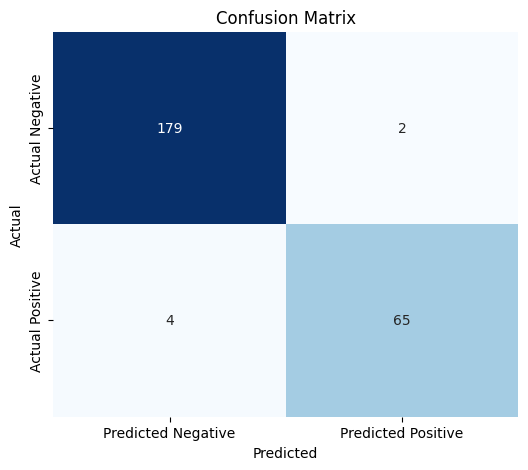

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generate confusion matrix
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])

plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [15]:
print(classification_report(y_pred , y_test))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       183
           1       0.94      0.97      0.96        67

    accuracy                           0.98       250
   macro avg       0.97      0.97      0.97       250
weighted avg       0.98      0.98      0.98       250



# Random Forest

In [16]:
from sklearn.model_selection import  train_test_split
# 1. Data Splitting
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.05,random_state=42)

# 2. Model
xgb_model=xgb.XGBClassifier(use_label_encoder=False,eval_metric='logloss') 

# 3. Train model
xgb_model.fit(X_train,y_train)

# 4. Make predictions
y_pred=xgb_model.predict(X_test)

# 5. Evaluate model
accuracy=accuracy_score(y_test,y_pred)

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:33:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [17]:
def create_xgb_model(best_params, X_train, y_train):
    model = xgb.XGBClassifier(
        **best_params,
        use_label_encoder=False,
        eval_metric='logloss'
    )

    model.fit(X_train, y_train)

    return model

In [18]:
def tune_xgb_hyperparameters(X_train, y_train, X_test, y_test):
    param_grid = {
        'n_estimators': [50, 100],
        'max_depth': [3, 5],
        'colsample_bytree': [0.7, 0.8],
        'learning_rate': [0.01, 0.05],
        'subsample': [0.7, 0.8],
        'gamma': [0, 0.1]
    }

    xgb_classifier = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

    random_search = RandomizedSearchCV(estimator=xgb_classifier, param_distributions=param_grid, 
                                       cv=3, n_iter=10, n_jobs=-1, verbose=10, random_state=42)

    random_search.fit(X_train, y_train)

    best_params = random_search.best_params_
    best_accuracy = random_search.best_score_

    best_xgb = random_search.best_estimator_
    test_accuracy = best_xgb.score(X_test, y_test)
    
    print("Best parameters found: ", best_params)
    print("Best accuracy achieved (on training data): ", best_accuracy)
    print(f"Test accuracy: {test_accuracy}")

    return best_params, best_accuracy, test_accuracy

In [19]:
# Call the function to tune hyperparameters and get the best parameters
best_params, best_accuracy, test_accuracy = tune_xgb_hyperparameters(X_train, y_train, X_test, y_test)

# Use the best parameters to create and train the model
model = create_xgb_model(best_params, X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters found:  {'subsample': 0.7, 'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 0.8}
Best accuracy achieved (on training data):  0.9877888965460032
Test accuracy: 0.984


c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:33:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:33:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


# Logistic Regression

# Using Sklearn

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Log_Reg = LogisticRegression()
Log_Reg.fit(X_train, y_train)

# Predict and evaluate
y_pred = Log_Reg.predict(X_test)
print("Predictions:", y_pred)
print("Accuracy:", accuracy_score(y_test, y_pred))


Predictions: [0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0
 1 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 1 0 1
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 1
 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0
 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0
 0 0 0 1 0 1 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0]
Accuracy: 0.86


c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [41]:
def tune_logistic_hyperparameters():
    param_grid = {
        'C': [0.01, 0.1, 1, 10, 100],         # Regularization strength
        'max_iter': [50, 100, 200, 300],      # Maximum number of iterations
        'solver': ['lbfgs', 'liblinear'],     # Solvers that support L2 and L1 regularization
        'penalty': ['l2'],                    # Regularization type (only 'l2' for these solvers)
    }

    log_reg = LogisticRegression()

    grid_search = GridSearchCV(
        estimator=log_reg,
        param_grid=param_grid,
        cv=5,                  # 5-fold cross-validation
        scoring='accuracy',    # Metric to optimize
        verbose=10,            # Detailed output of the search process
        n_jobs=-1              # Use all available cores for faster computation
    )

    grid_search.fit(X_train, y_train)

    print("Best Parameters:", grid_search.best_params_)
    print("Best Cross-Validation Accuracy:", grid_search.best_score_)

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    print("Test Accuracy:", test_accuracy)
    return best_model


In [42]:
model = tune_logistic_hyperparameters()
y_pred = model.predict(X_test)
print("accuracy_score: " , accuracy_score(y_pred=y_pred , y_true=y_test))
print("Recall Score:", recall_score(y_true=y_test, y_pred=y_pred, average='binary'))
print("Precision Score:", precision_score(y_true=y_test, y_pred=y_pred, average='binary'))
print("F1 Score:", f1_score(y_true=y_test, y_pred=y_pred, average='binary'))

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best Parameters: {'C': 0.01, 'max_iter': 50, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Cross-Validation Accuracy: 0.907157894736842
Test Accuracy: 0.88
accuracy_score:  0.88
Recall Score: 0.6666666666666666
Precision Score: 0.8679245283018868
F1 Score: 0.7540983606557377


c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Manual Implementation

In [20]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [21]:
def loss(y_pred, y):
    return - (y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

In [27]:
def cost_func(X , y , w ,b):
    y_pred = sigmoid(np.dot(X , w.T) + b)
    y_pred[np.isinf(y_pred)] = 1e-15
    cost = np.mean(loss(y_pred , y)) # (m , n) @(n , 1)--> (m , 1) + b -> (m+b , 1)
    return cost

In [28]:
def derivatives(X , y , w , b):
    m = X.shape[0]
    dw = np.zeros_like(w)
    db = 0
    y_pred = sigmoid(np.dot(X , w.T) + b)
    y_pred[np.isinf(y_pred)] = 1e-15
    error = y_pred - y
    dw = (1 / m) * np.dot(error.T, X)  # Gradient of loss with respect to weights
    db = (1 / m) * np.sum(error)
    return dw , db

In [30]:
def Gradient_Descent(X , y , w , b , alpha , epochs):
   # Hyperparameters for Adam optimizer
    beta1 = 0.9   # Exponential decay rate for the first moment estimate
    beta2 = 0.999 # Exponential decay rate for the second moment estimate
    epsilon = 1e-8 # Small number to avoid division by zero
    
    m_w = np.zeros_like(w)   # Initialize first moment for weights
    v_w = np.zeros_like(w)   # Initialize second moment for weights
    m_b = 0                  # Initialize first moment for bias
    v_b = 0                  # Initialize second moment for bias
    t = 0                    # Time step counter
    
    for i in range(epochs):
        t += 1  # Increment the time step
        
        # Forward pass
        cost = cost_func(X , y , w , b)
        
        # Backward pass
        dw, db = derivatives(X , y , w , b)
        # Update weights and bias
        w = w - alpha * dw
        b = b - alpha * db
        if(i % 10000 == 0):
            print(cost)
    return w, b

In [31]:
w = np.zeros((1 , X.shape[1]))
b = 0

In [38]:
updated_w , updated_b = Gradient_Descent(X_train , y_train , w , b , 0.01 , 80000)

0.6931471805599453
0.19300020826040035
0.18935959950417117
0.18874156017732918
0.1885799517736491
0.18852210320396337
0.18849551694495087
0.1884812255069081


In [33]:
print(updated_w)
print(updated_b)

[[ 0.25520494  0.02265991  0.09775791 -0.09367566 -0.00383444 -3.17529606
   0.20455798 -0.02547547 -2.31807696  2.31511534  0.08303763  0.17916106
   0.34260695  0.14316126  0.03970752  0.14115772]]
0.6666334533289103


In [34]:
print(cost_func(X_train , y_train , w , b))
print(cost_func(X_test , y_test , w , b))

0.6931471805599453
0.6931471805599454


In [35]:
print(cost_func(X_train , y_train , updated_w , updated_b))
print(cost_func(X_test , y_test , updated_w , updated_b))

0.1885799517736491
0.2256450234460412


In [37]:
y_pred =sigmoid(np.dot(X_test , w.T) + b)
y_pred = [0 if i < 0.5 else 1 for i in y_pred]
print("accuracy_score: " , accuracy_score(y_pred=y_pred , y_true=y_test))
print("Recall Score:", recall_score(y_true=y_test, y_pred=y_pred, average='binary'))
print("Precision Score:", precision_score(y_true=y_test, y_pred=y_pred, average='binary'))
print("F1 Score:", f1_score(y_true=y_test, y_pred=y_pred, average='binary'))


accuracy_score:  0.276
Recall Score: 1.0
Precision Score: 0.276
F1 Score: 0.43260188087774293
